<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
pwd

'/home/caliskanahmet6'

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [3]:
my_data_dir='data/'

In [4]:
os.listdir(my_data_dir)

['test', 'validation', 'train']

In [5]:
val_path = my_data_dir+'validation'
train_path = my_data_dir+'train'
test_path = my_data_dir+'test'

In [6]:
os.listdir(train_path)

['dog', 'cat']

In [7]:
len(os.listdir(test_path))

6897

Yaptığımız egitimi GPU ile yapıyoruz. Bunu CPU ile yapmaya kalkarsak zaman olarak altından kalkamayız. Uzun zaman alır. Bunu model olarak deploy ettiğimizde ise CPU kullanılıyor. Çünkü direkt RAM den okuma yapıyor. Bunu TF ile load ettiğimizde bunu memory den alıyor ve CPU ile bunu çalıştırması çok kolay. Memory görevi CPU ya RAM sağlamak. 

**Let's check how many images there are.**

In [8]:
len(os.listdir(train_path+'/cat'))

12500

In [9]:
len(os.listdir(train_path+'/dog'))

5026

In [10]:
os.listdir(train_path+'/cat')[0]

'cat.7447.jpg'

In [11]:
path1=train_path+'/cat'+'/cat.0.jpg'
path2=train_path+'/dog'+'/dog.1.jpg'

In [12]:
cat_img=imread(path1)  # imread ile okuyunca numpy array oluyor.
dog_img=imread(path2)

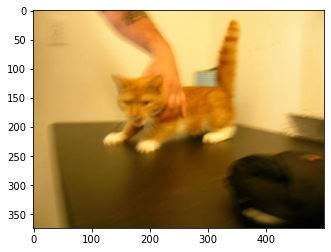

In [13]:
plt.imshow(cat_img)

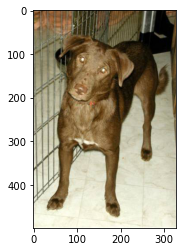

In [14]:
plt.imshow(dog_img)

**Let's decide on the final dimension of these images.**

In [15]:
cat_img.max() 

# bunun hangi kanaldan geldiğini bilmiyoruz. Yani R G B mi? 
# Bunu scale etmemiz yerinde olabilir. Conv. hızlanabileceğini değerlendiriyoruz.

255

In [16]:
cat_img.min()

0

In [17]:
cat_img.shape

(374, 500, 3)

In [18]:
dog_img.shape

(499, 327, 3)

In [19]:
x= []
y = []
for image in os.listdir(train_path+'/cat'):
    
    img = imread(train_path+'/cat/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

<AxesSubplot:>

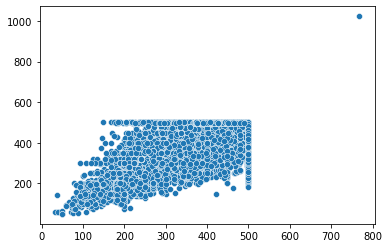

In [20]:
sns.scatterplot(x=x,y=y)

aslında yukarıdaki resim bir outlier değil. Computer vision da outlier karanlık, flu, çok aydınlık resimler olanlar kabul ediliyor. Bu resimleri tespit edip preprocessing yapıyoruz veya atıyoruz. Çözünürlüğü yüksek resimlerde overfit olma ihtimali artar. Okuma yazma işlemi çok fazla yaptığımızdan dolayı hd den makineyi sıkıntıya sokan bu husus oluyor. Bu aslında RAM a sığsa bu işlem çok hızlanır. RAM da rastgele okuma yaptığından dolayı hızlı olurken HD den sıralı yaptığından dolayı bu işlem çok yavaş oluyor. Batch size artırmakta overfite sebep olabiliyor.

In [21]:
np.mean(x)

356.46712

In [22]:
np.mean(y)

410.52264

In [23]:
image_shape = (256,256,3)

In [24]:
# help(ImageDataGenerator)

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

horizontal_flip=True resmi alıp yatay olarak flip ediyor. aşağıdaki gibi aynalanmış bir görüntü veriyor. böylece öğrenme güce artıyor ve resmin her tarafını görmüş oluyor.

imagedatagenerator'da seçilen parametreler dataya göre değişkenlik gösterebilir.

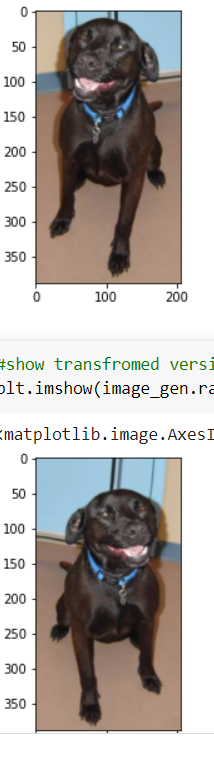

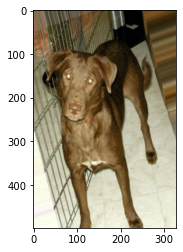

In [27]:
plt.imshow(image_gen.random_transform(dog_img))

### Generating many manipulated images from a directory


flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

<img src="flw.png" width=380 height=380>

image_gen.flow_from_directory(train_path)

In [28]:
image_gen.flow_from_directory(val_path)

Found 2290 images belonging to 2 classes.


In [29]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


# Creating the Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

notebooklarda daha farklı tanımlamalar olduğunu görebiliriz. aşağıdaki structure denemeler sonucu ulaştık. 

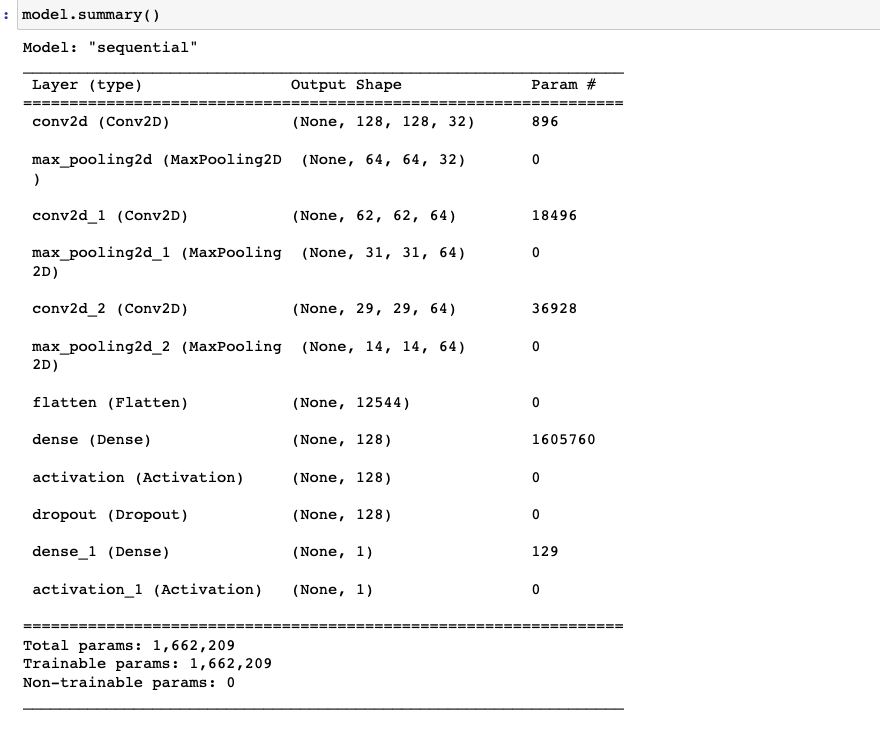

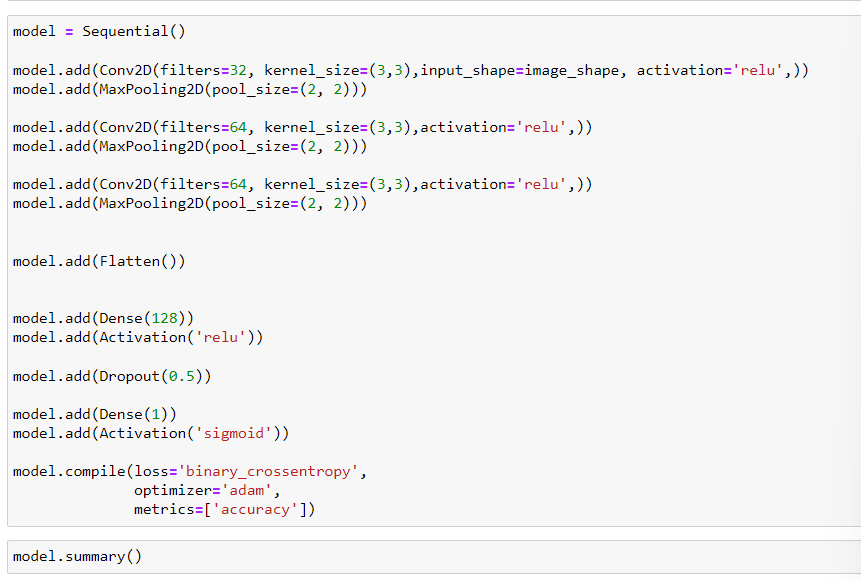

In [31]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())


model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-03-16 16:55:33.298857: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-16 16:55:33.953794: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38394 MB memory:  -> device: 0, name: A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 activation (Activation)     (None, 125, 125, 128)     0         
                                                                 
 dropout_1 (Dropout)         (None, 125, 125, 128)     0         
                                                        

## Early Stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [35]:
batch_size = 16

In [36]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 17526 images belonging to 2 classes.


!!! önemli:

shuffle=True ile çalıştırınca iyi score alıyoruz. predict yaparken shuffle=False yapmamız gerekir.

shuffle=True kullanınca her epoch sonunda validation datasını koruyor. shuffle=False deyince dataları alphanumeric olarak sıralama yapıyor. o yüzden predict yaparken bunu True yapmamak gerekir.

In [37]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 2290 images belonging to 2 classes.


In [38]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False, seed=42)

Found 0 images belonging to 0 classes.


In [39]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [40]:
test_image_gen.class_indices

{}

## Model Training

tüm datamı traine sokmamış oluyorum. Çok datam olduğunda uyguluyorum.

Her epoch'ta datayı kardığı için datanın farklı yerlerinden eğitim yapıyor her epoch'ta. dropout nöronların kapanması ile ilgili, Burada ise datamızın hepsini kullanma farklı yerlerinden eğitim yap diyoruz. Uygulama yerleri farklı.

In [41]:
STEP_SIZE_TRAIN=train_image_gen.n//train_image_gen.batch_size
STEP_SIZE_VAL=val_image_gen.n//val_image_gen.batch_size
STEP_SIZE_TEST=test_image_gen.n//test_image_gen.batch_size

In [42]:
STEP_SIZE_TRAIN, STEP_SIZE_VAL, STEP_SIZE_TEST

(1095, 143, 0)

In [ ]:
results = model.fit(train_image_gen,epochs=20,
                    validation_data=val_image_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_steps=STEP_SIZE_VAL,
                    callbacks=[early_stop])

Epoch 1/20


2022-03-16 16:55:37.103350: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-03-16 16:55:39.243785: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1095/1095 [==============================] - 295s 265ms/step - loss: 0.6254 - accuracy: 0.6876 - val_loss: 1.2066 - val_accuracy: 0.5323
Epoch 2/20
1095/1095 [==============================] - 288s 263ms/step - loss: 0.5757 - accuracy: 0.7216 - val_loss: 0.9411 - val_accuracy: 0.5323
Epoch 3/20
1095/1095 [==============================] - 288s 263ms/step - loss: 0.5667 - accuracy: 0.7304 - val_loss: 0.8718 - val_accuracy: 0.5323
Epoch 4/20
1095/1095 [==============================] - 289s 264ms/step - loss: 0.5607 - accuracy: 0.7353 - val_loss: 0.9641 - val_accuracy: 0.5323
Epoch 5/20
 440/1095 [===========>..................] - ETA: 2:33 - loss: 0.5509 - accuracy: 0.7442

# Evaluating the Model

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(val_image_gen,
steps=STEP_SIZE_VAL)

In [ ]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True, seed=42)

In [ ]:
pred_probabilities = model.predict(val_image_gen) 

# her resim için 0-1 arasında olasılık döndürecek. ayrı bir func ihtiyaç yok probabl. için.

In [ ]:
pred_probabilities

In [ ]:
val_image_gen.classes

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(val_image_gen.classes,predictions))

In [ ]:
confusion_matrix(val_image_gen.classes,predictions)

In [ ]:
from tensorflow.keras.models import load_model
#model.save('cat_dog_detector.h5')

https://www.tensorflow.org/tfx/serving/serving_basic ile modellerimizi internette yayınlayabiliriz.

# Predicting on an Image

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('cat_dog_detector.h5')

In [ ]:
#from PIL import Image

In [ ]:
img=image.load_img('iu.jpeg')
img

In [ ]:
resized_img = img.resize((128, 128))
resized_img

In [ ]:
resized_img1=np.array(resized_img)
resized_img1.shape

In [ ]:
resized_img1=np.expand_dims(resized_img1, axis=0)
resized_img1.shape

In [ ]:
model.predict(resized_img1).round()